/cvmfs/sft.cern.ch/lcg/views/LCG_104a_cuda/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


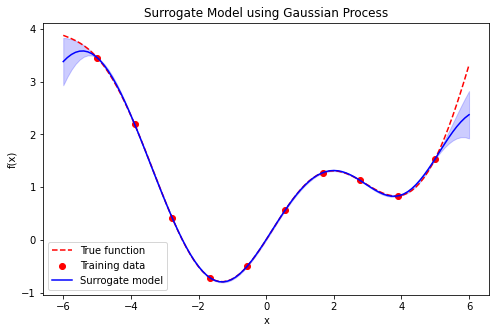

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Define the expensive function
def expensive_function(x):
    return np.sin(x) + 0.1 * x**2

# Generate training data (simulating expensive evaluations)
x_train = np.linspace(-5, 5, 10).reshape(-1, 1)
y_train = expensive_function(x_train)

# Train a Gaussian Process surrogate model
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(x_train, y_train)

# Test the surrogate model on new data
x_test = np.linspace(-6, 6, 100).reshape(-1, 1)
y_true = expensive_function(x_test)
y_pred, sigma = gp.predict(x_test, return_std=True)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(x_test, y_true, "r--", label="True function")
plt.scatter(x_train, y_train, color="red", label="Training data")
plt.plot(x_test, y_pred, "b", label="Surrogate model")
plt.fill_between(x_test.ravel(), y_pred - 2*sigma, y_pred + 2*sigma, alpha=0.2, color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Surrogate Model using Gaussian Process")
plt.show()


/cvmfs/sft.cern.ch/lcg/views/LCG_104a_cuda/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


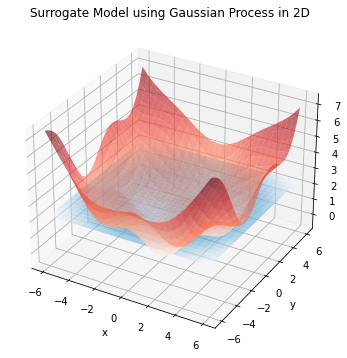

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from mpl_toolkits.mplot3d import Axes3D

# Define an expensive function in 2D
def expensive_function(X):
    x, y = X[:, 0], X[:, 1]
    return np.sin(x) * np.cos(y) + 0.1 * (x**2 + y**2)

# Generate training data (simulating expensive evaluations)
x_train = np.linspace(-5, 5, 5)
y_train = np.linspace(-5, 5, 5)
X_train = np.array(np.meshgrid(x_train, y_train)).T.reshape(-1, 2)
y_train = expensive_function(X_train)

# Train a Gaussian Process surrogate model
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(X_train, y_train)

# Test the surrogate model on new data
x_test = np.linspace(-6, 6, 30)
y_test = np.linspace(-6, 6, 30)
X_test = np.array(np.meshgrid(x_test, y_test)).T.reshape(-1, 2)
y_true = expensive_function(X_test)
y_pred, sigma = gp.predict(X_test, return_std=True)

# Reshape for plotting
X_grid, Y_grid = np.meshgrid(x_test, y_test)
Y_true_grid = y_true.reshape(30, 30)
Y_pred_grid = y_pred.reshape(30, 30)

# Plot the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Y_true_grid, cmap='Reds', alpha=0.6, label="True function")
ax.plot_surface(X_grid, Y_grid, Y_pred_grid, cmap='Blues', alpha=0.6, label="Surrogate model")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_title("Surrogate Model using Gaussian Process in 2D")
plt.show()
